In [23]:
!pip install opendatasets
import opendatasets as od
dataset_link="https://www.kaggle.com/competitions/udea-ai4eng-20242"
od.download(dataset_link)
#{"username":"gonzandres","key":"fa2731bdd837290a987f98515ff47e13"}

Skipping, found downloaded files in "./udea-ai4eng-20242" (use force=True to force download)


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df =pd.read_csv("/content/udea-ai4eng-20242/train.csv")
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [25]:
df._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
ID,692500.0,494606.130576,285585.209455,1.0,247324.75,494564.5,741782.5,989286.0
PERIODO,692500.0,20198.366679,10.535037,20183.0,20195.00,20195.0,20203.0,20213.0


## **Data Overview and Preprocessing**

- All variables are categorical, including ID and PERIODO, which Python may interpret as numerical.

- The ID variable is typically a unique identifier and could be removed from the dataset.

    ### *Target Variable Label Encoding*

In [26]:
df["RENDIMIENTO_GLOBAL_encoded"] = pd.Categorical(
    df["RENDIMIENTO_GLOBAL"],
    categories=["bajo", "medio-bajo", "medio-alto", "alto"],
    ordered=True,
).codes

df[["RENDIMIENTO_GLOBAL", "RENDIMIENTO_GLOBAL_encoded"]].head()

,RENDIMIENTO_GLOBAL,RENDIMIENTO_GLOBAL_encoded
0,medio-alto,2
1,bajo,0
2,bajo,0
3,alto,3
4,medio-bajo,1


In [27]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df["ID"], df["RENDIMIENTO_GLOBAL_encoded"])

# Perform Chi-Square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

# Print the p-value
print(f"Chi-Square Test p-value: {p_val}")

# If p-value is high (above 0.05), ID and RENDIMIENTO_GLOBAL are not related.
if p_val > 0.05:
    print("There is NOT a significant relationship between ID y RENDIMIENTO_GLOBAL.")
else:
    print("There is a significant relationship between ID y RENDIMIENTO_GLOBAL.")

Chi-Square Test p-value: 0.49928237777100926
There is NOT a significant relationship between ID y RENDIMIENTO_GLOBAL.


As a result, the ID column is removed from the dataset.

In [28]:
df.drop("ID", axis=1, inplace=True)

Absolute frequency plots and correlation charts are generated to observe relationships with the target variable.

In [29]:
columns_not_wanted = ["RENDIMIENTO_GLOBAL_encoded", "RENDIMIENTO_GLOBAL"]
columns_to_plot = [col for col in df.columns if col not in columns_not_wanted]

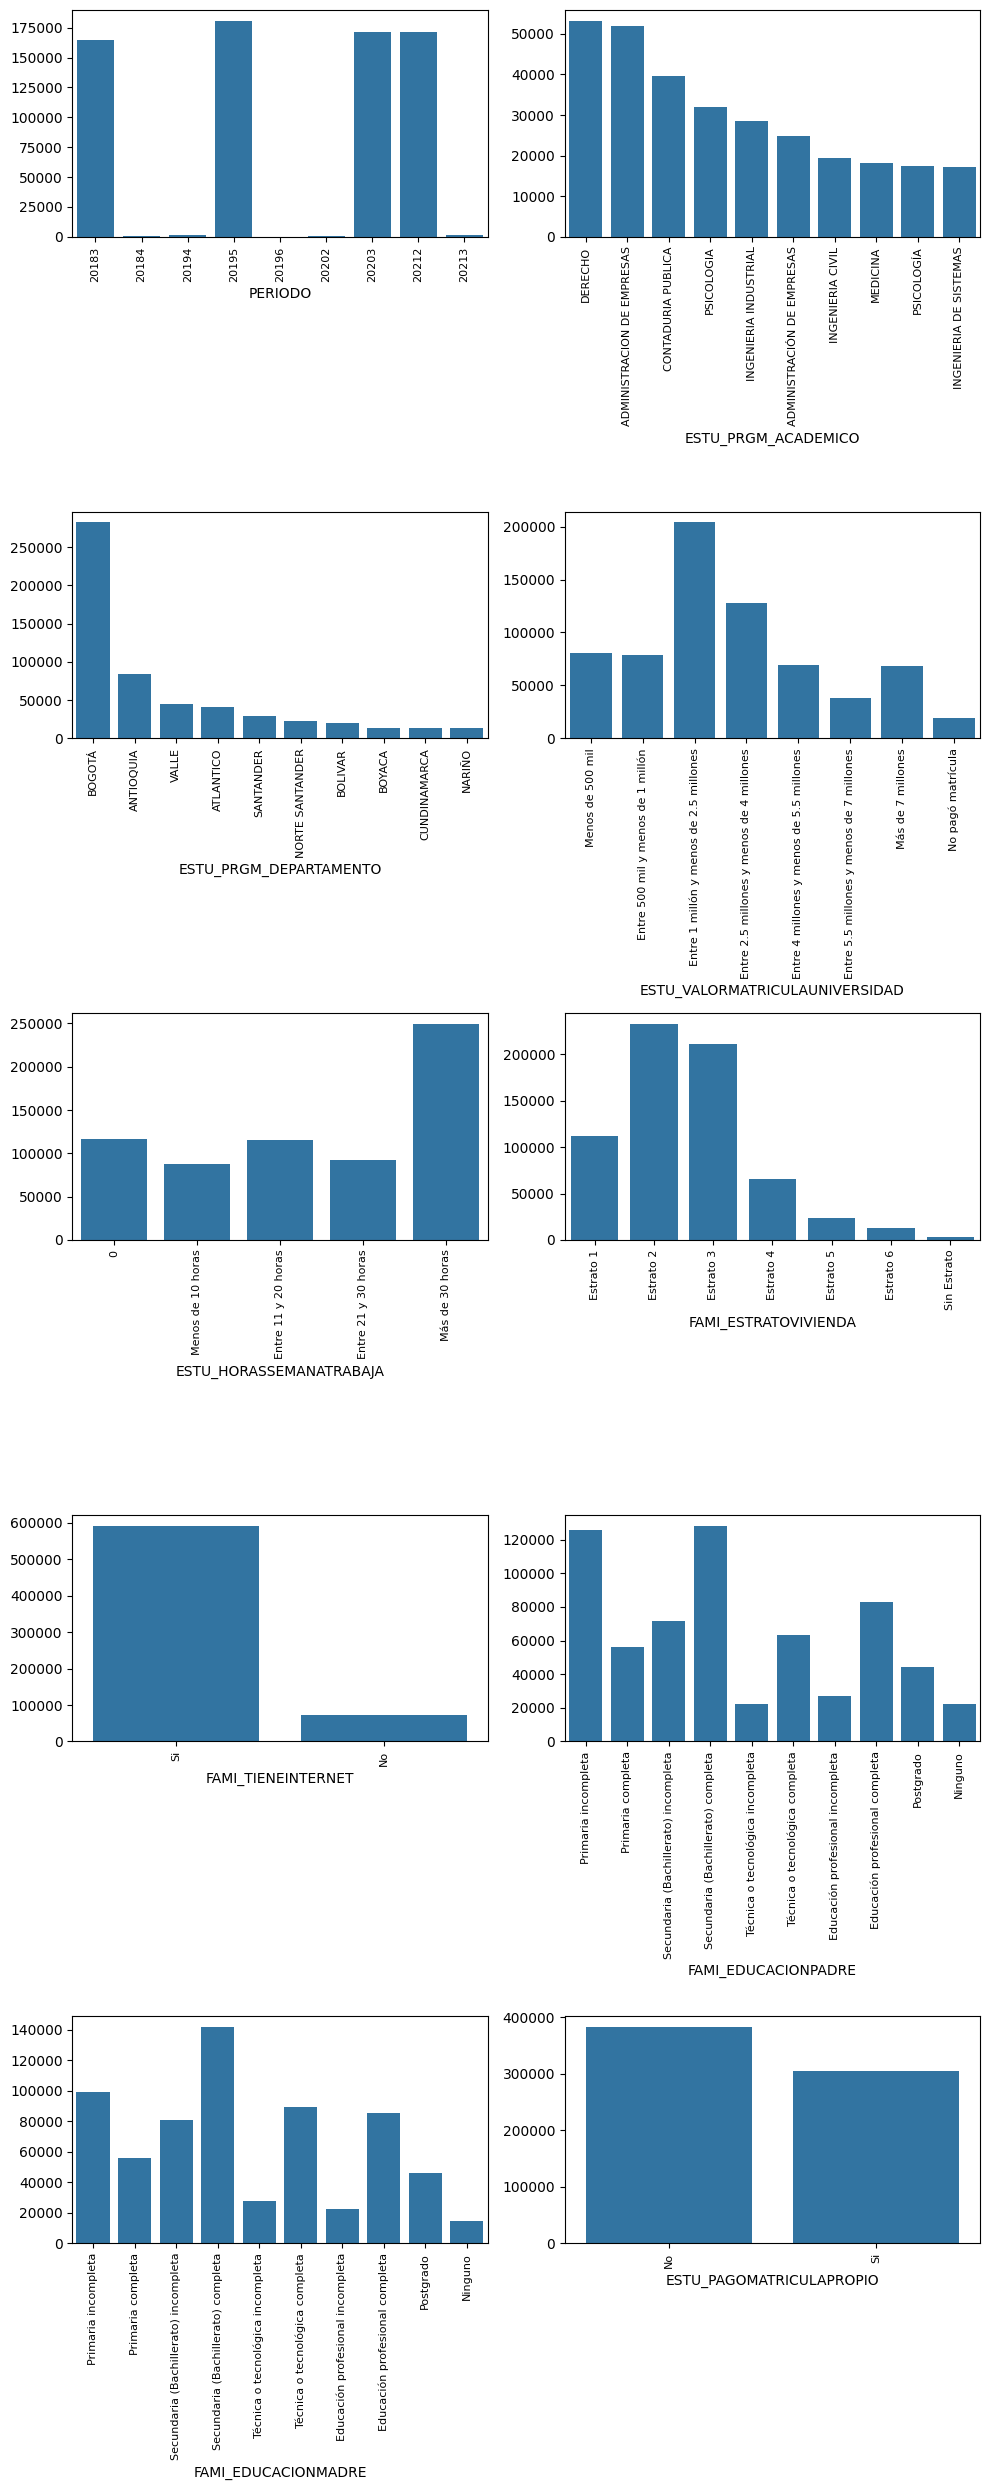

In [30]:
order_PERIODO = [
    20183,
    20184,
    20194,
    20195,
    20196,
    20202,
    20203,
    20212,
    20213,
]

order_ESTU_VALORMATRICULAUNIVERSIDAD = [
    "Menos de 500 mil",
    "Entre 500 mil y menos de 1 millón",
    "Entre 1 millón y menos de 2.5 millones",
    "Entre 2.5 millones y menos de 4 millones",
    "Entre 4 millones y menos de 5.5 millones",
    "Entre 5.5 millones y menos de 7 millones",
    "Más de 7 millones",
    "No pagó matrícula",
]

order_ESTU_HORASSEMANATRABAJA = [
    "0",
    "Menos de 10 horas",
    "Entre 11 y 20 horas",
    "Entre 21 y 30 horas",
    "Más de 30 horas",
]

order_FAMI_ESTRATOVIVIENDA = [
    "Estrato 1",
    "Estrato 2",
    "Estrato 3",
    "Estrato 4",
    "Estrato 5",
    "Estrato 6",
    "Sin Estrato",
]

order_FAMI_EDUCACION_PADRES = [
    'Primaria incompleta',
    'Primaria completa',
    'Secundaria (Bachillerato) incompleta',
    'Secundaria (Bachillerato) completa',
    'Técnica o tecnológica incompleta',
    'Técnica o tecnológica completa',
    'Educación profesional incompleta',
    'Educación profesional completa',
    'Postgrado',
    'Ninguno',
]

plt.figure(figsize=(10, 25))

# Loop through the specified categorical columns
for i, c in enumerate(columns_to_plot):
    plt.subplot(5, 2, i + 1)
    k = df[[c, "RENDIMIENTO_GLOBAL_encoded"]].dropna()
    vc = k[c].value_counts().nlargest(10)

    # Apply custom ordering for the column only for plotting
    if c == "ESTU_VALORMATRICULAUNIVERSIDAD":
        vc = vc.reindex(order_ESTU_VALORMATRICULAUNIVERSIDAD)
    elif c == "ESTU_HORASSEMANATRABAJA":
        vc = vc.reindex(order_ESTU_HORASSEMANATRABAJA)
    elif c == "FAMI_ESTRATOVIVIENDA":
        vc = vc.reindex(order_FAMI_ESTRATOVIVIENDA)
    elif c == "PERIODO":
        vc = vc.reindex(order_PERIODO)
    elif c == "FAMI_EDUCACIONPADRE" or c == "FAMI_EDUCACIONMADRE":
        vc = vc.reindex(order_FAMI_EDUCACION_PADRES)

    sns.barplot(x=vc.index, y=vc.values)  # Specify x and y as keyword arguments
    plt.xticks(
        range(len(vc)), vc.index, rotation="vertical", fontsize=8
    )  # Rotate x-axis labels

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Show the plots

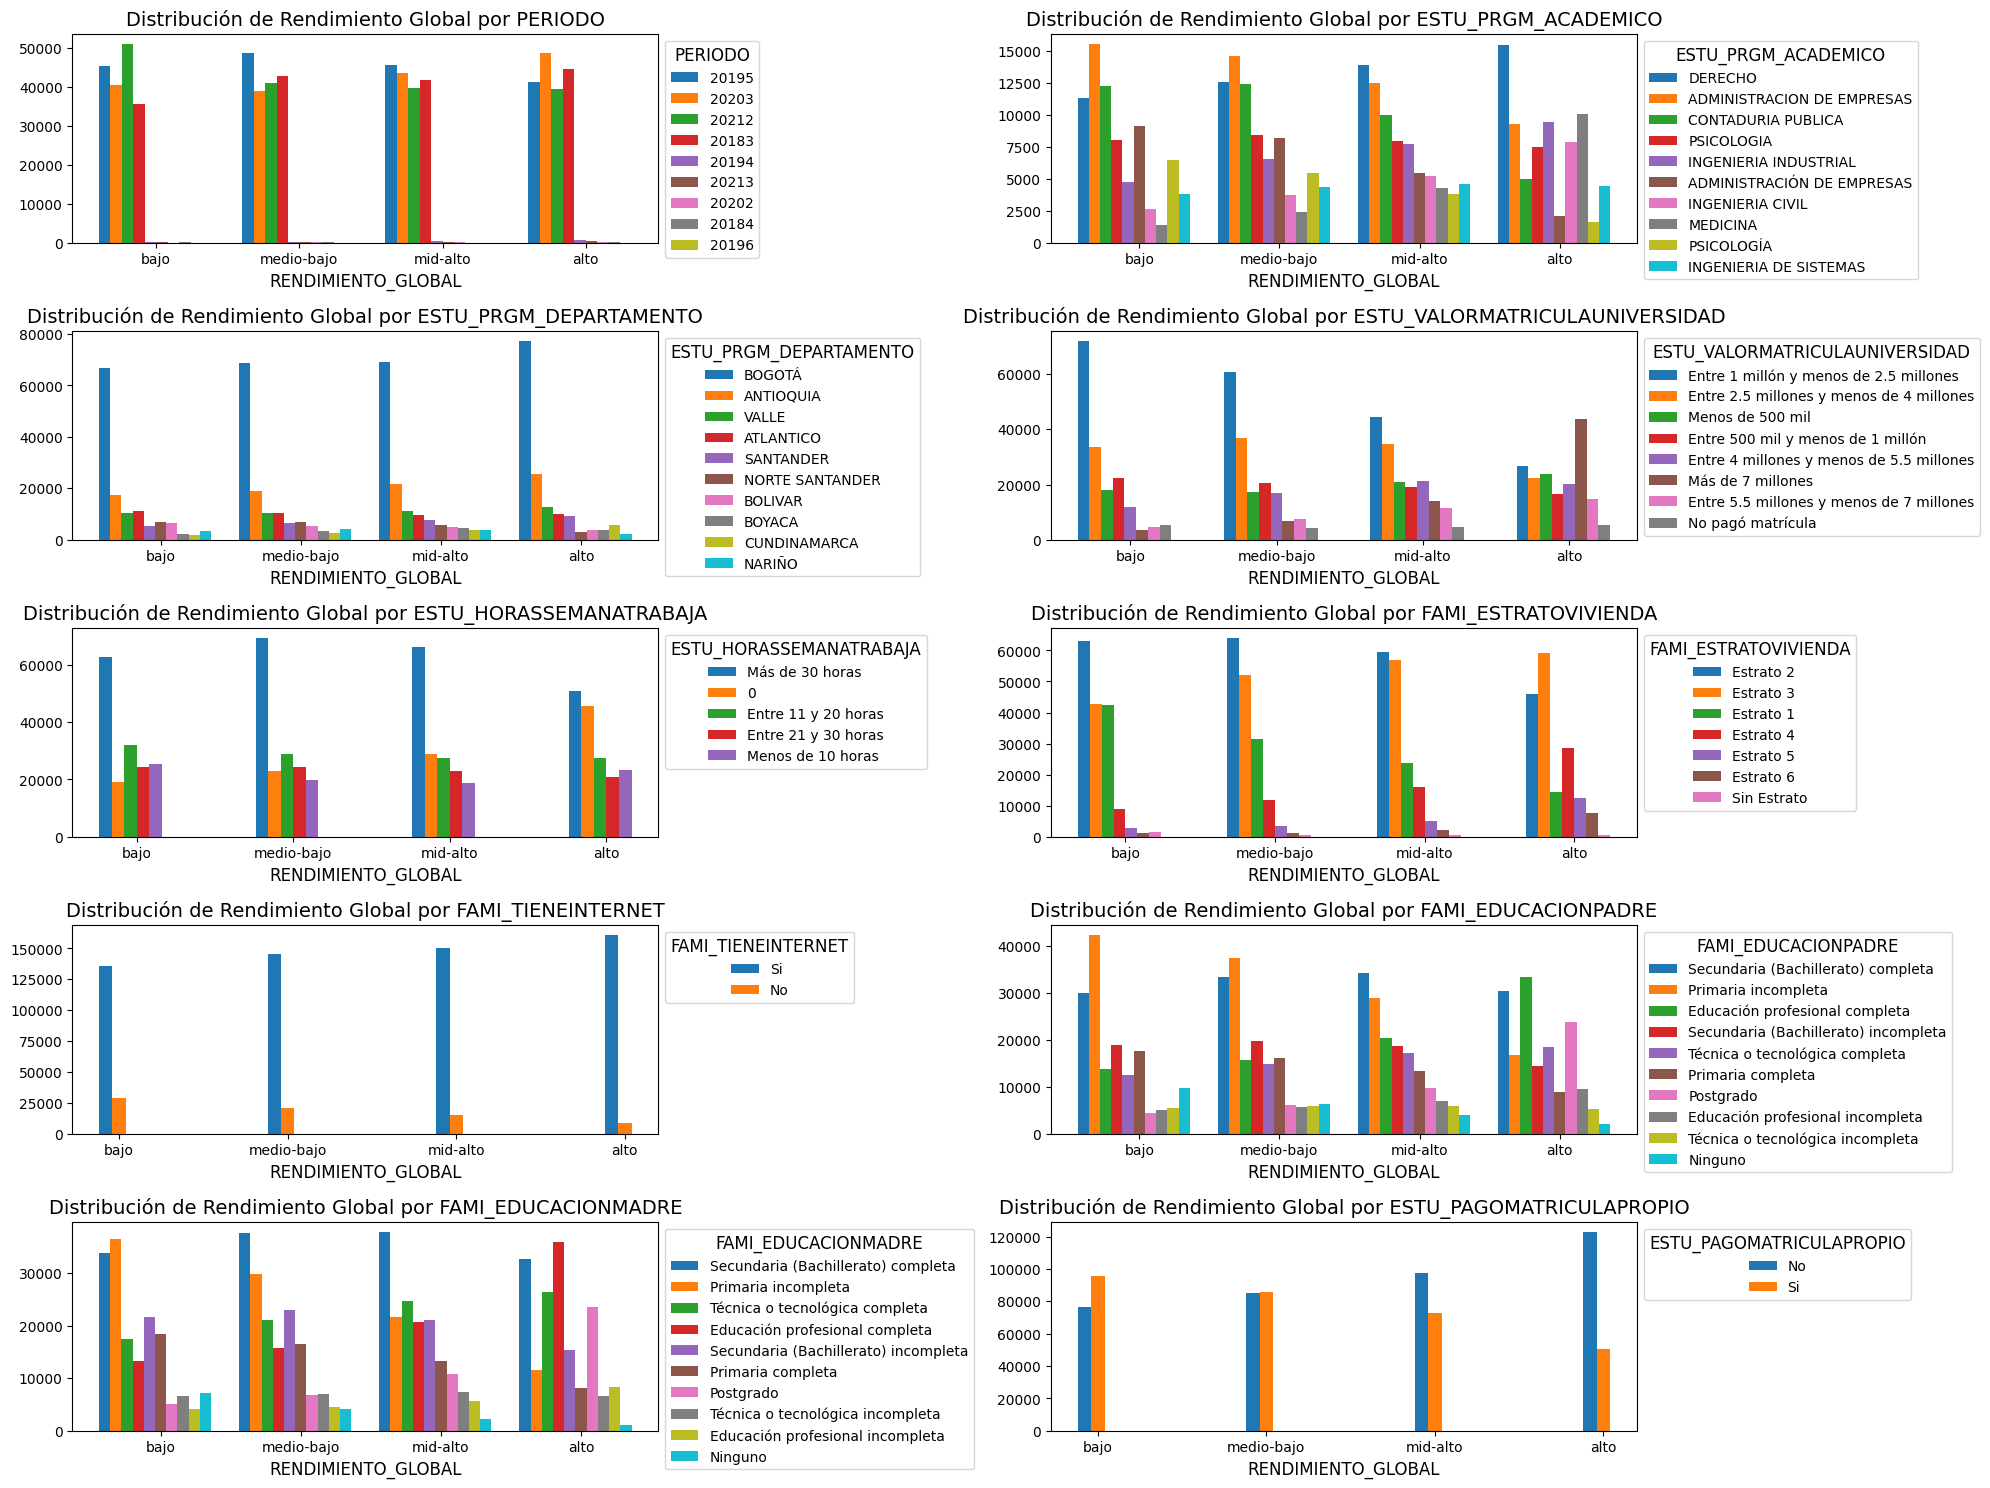

In [31]:
plt.figure(figsize=(20, 15))

# Loop through the specified categorical columns
for i, c in enumerate(columns_to_plot):
    # First subplot for distribution plot
    plt.subplot(5, 2, i + 1)
    k = df[[c, "RENDIMIENTO_GLOBAL_encoded"]].dropna()

    # Create a DataFrame with the values of the current column
    values = k[c].value_counts().nlargest(10).index

    # Set up the positions for each 'RENDIMIENTO_GLOBAL_encoded' value (4 positions)
    positions = np.arange(4)  # Corresponds to 'low', 'mid-low', 'mid-high', 'high'

    # Set the width of each bar and the shift amount to space them
    shift = 0.08  # Space between bars for each program
    bar_width = 0.08  # Width of each bar

    # Loop through the top values and plot the distribution
    for i, v in enumerate(values):
        # Get the counts of each 'RENDIMIENTO_GLOBAL_encoded' value for the current column
        counts = k[k[c] == v]["RENDIMIENTO_GLOBAL_encoded"].value_counts().sort_index()

        # Plot each bar, shifted slightly by i * shift
        plt.bar(positions + i * shift, counts, width=bar_width, label=str(v))

    # Customizing the plot labels
    plt.title(f"Distribución de Rendimiento Global por {c}", fontsize=14)
    plt.xlabel("RENDIMIENTO_GLOBAL", fontsize=12)

    # Adjust x-axis tick positions and labels for 'RENDIMIENTO_GLOBAL_encoded'
    plt.xticks(
        positions + shift * (len(values) / 2),
        ["bajo", "medio-bajo", "mid-alto", "alto"],
    )

    # Move the legend outside of the plot
    plt.legend(
        title=c, fontsize=10, title_fontsize=12, loc="upper left", bbox_to_anchor=(1, 1)
    )


plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Show the plots

Based on the trends observed in the charts, no clear correlation is found between 'RENDIMIENTO_GLOBAL' and the columns 'PERIODO' and 'ESTU_PRGM_DEPARTAMENTO'.

-As such, the 'PERIODO' column is removed from the dataset.

In [32]:
df.drop("PERIODO", axis=1, inplace=True)
columns_to_plot.remove("PERIODO")

### Handling Missing Data

In [33]:
k = df.isna().sum()
k[k != 0]
columns_with_missing = df.columns[df.isnull().any()]

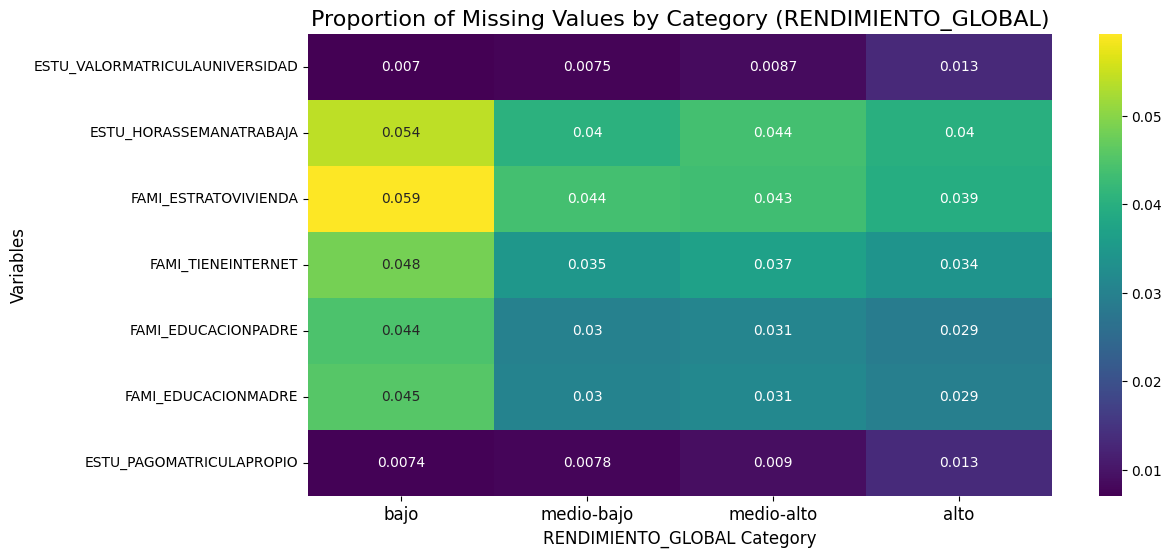

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame that shows where values are missing (True for missing, False otherwise)
missing_data = df[columns_with_missing].isnull()

# Add the target variable to the missing data DataFrame
missing_data["RENDIMIENTO_GLOBAL_encoded"] = df["RENDIMIENTO_GLOBAL_encoded"]

# Plot a heatmap where rows represent the records and columns represent the variables
plt.figure(figsize=(12, 6))
sns.heatmap(
    missing_data.groupby("RENDIMIENTO_GLOBAL_encoded").mean().T,
    cmap="viridis",
    annot=True,
)

# Customize the plot
plt.title("Proportion of Missing Values by Category (RENDIMIENTO_GLOBAL)", fontsize=16)
plt.xlabel("RENDIMIENTO_GLOBAL Category", fontsize=12)
plt.ylabel("Variables", fontsize=12)

# Adjust xticks to be in the middle of the columns
midpoints = [0.5, 1.5, 2.5, 3.5]  # Midpoints between the columns
plt.xticks(midpoints, ["bajo", "medio-bajo", "medio-alto", "alto"], fontsize=12)

# Show the plot
plt.show()

-The impact of missing data is analyzed for certain variables. Variables like 'ESTU_HORASSEMANATRABAJA' and 'FAMI_ESTRATOVIVIENDA' have higher proportions of missing data for the "bajo" (low) performance group.
- It could be useful to investigate why this happens, as there might be structural reasons for missing data in this category.

-Family-related variables (education levels, internet access, etc.) and questions asked directly to the respondent (as opposed to institution-provided data such as tuition payment or university fees) have moderate proportions of missing data, especially in the low-performance group.
- This may indicate socioeconomic factors influencing data collection processes.

-Since the variables with missing data show correlation with the target variable, they are not removed but will instead be imputed.

### **Categorical Variable Grouping and Encoding**

-Grouping the 'ESTU_PRGM_ACADEMICO' column to reduce the number of unique academic programs.

In [35]:
# Get the value counts for each program
program_counts = df['ESTU_PRGM_ACADEMICO'].value_counts()

# Create a DataFrame with programs and their counts
program_counts_df = pd.DataFrame({'ESTU_PRGM_ACADEMICO': program_counts.index, 'Count': program_counts.values})

# Define the bins and labels
bins = [0, 10000, 20000, 30000, 40000, float('inf')]
labels = ['Muy raro (1-10000)', 'Raro (10000-20000)', 'Moderadamente popular (20000-30000)', 'Popular (30000-40000)', 'Muy Popular (>40000)']

# Categorize programs based on their count
program_counts_df['ESTU_PRGM_ACADEMICO_count'] = pd.cut(program_counts_df['Count'], bins=bins, labels=labels, right=False)

# Merge the categorized data back into the original DataFrame
df = pd.merge(df, program_counts_df[['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_ACADEMICO_count']], on='ESTU_PRGM_ACADEMICO', how='left')

print(df[['ESTU_PRGM_ACADEMICO_count']].head())

  ESTU_PRGM_ACADEMICO_count
0        Raro (10000-20000)
1      Muy Popular (>40000)
2        Muy raro (1-10000)
3      Muy Popular (>40000)
4     Popular (30000-40000)


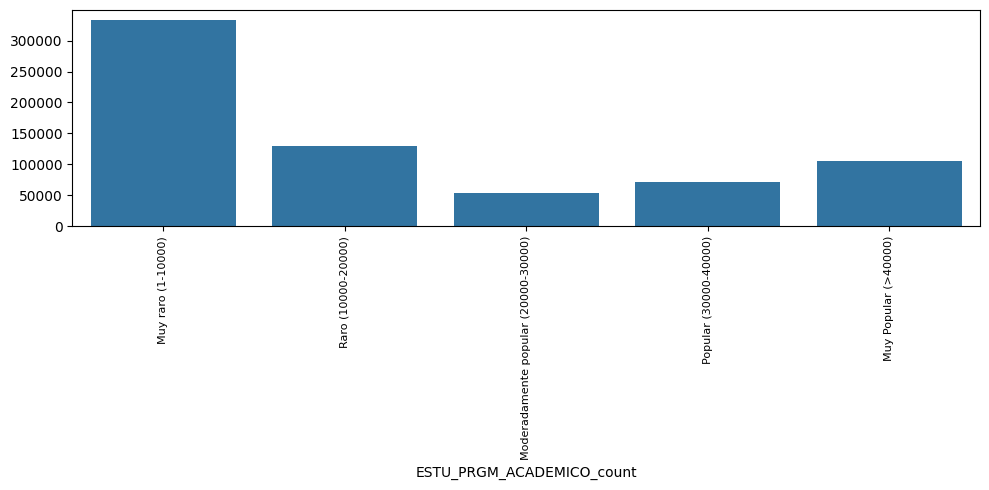

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the order
order_ESTU_PRGM_ACADEMICO_count = [
    'Muy raro (1-10000)',
    'Raro (10000-20000)',
    'Moderadamente popular (20000-30000)',
    'Popular (30000-40000)',
    'Muy Popular (>40000)'
]

# Create the figure
plt.figure(figsize=(10, 5))

# Filter the DataFrame and drop NaNs
k = df[['ESTU_PRGM_ACADEMICO_count', "RENDIMIENTO_GLOBAL_encoded"]].dropna()

# Count the values and reindex according to the desired order
vc = k['ESTU_PRGM_ACADEMICO_count'].value_counts()

# Reindex to ensure the order and fill missing categories with 0
vc = vc.reindex(order_ESTU_PRGM_ACADEMICO_count, fill_value=0)

# Create the bar plot
sns.barplot(x=vc.index, y=vc.values)

# Rotate x-axis labels
plt.xticks(rotation="vertical", fontsize=8)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
ordinal_variables = [
    "ESTU_VALORMATRICULAUNIVERSIDAD",
    "ESTU_HORASSEMANATRABAJA",
    "FAMI_ESTRATOVIVIENDA",
    "ESTU_PRGM_ACADEMICO_count",
    "FAMI_EDUCACIONPADRE",
    "FAMI_EDUCACIONMADRE",
]

nominal_variables = [
        "ESTU_PRGM_DEPARTAMENTO",
        "FAMI_TIENEINTERNET",
        "ESTU_PAGOMATRICULAPROPIO",
    ]


Label encoding is used for ordinal variables.

In [38]:
order_ESTU_PRGM_ACADEMICO_count = [
    "Muy raro (1-10000)",
    "Raro (10000-20000)",
    "Moderadamente popular (20000-30000)",
    "Popular (30000-40000)",
    "Muy Popular (>40000)",
]

target_columns = ["RENDIMIENTO_GLOBAL", "RENDIMIENTO_GLOBAL_encoded"]
X = df.drop(columns=["RENDIMIENTO_GLOBAL", "RENDIMIENTO_GLOBAL_encoded", "ESTU_PRGM_ACADEMICO"])
y = df[target_columns]  # Target DataFrame

# Convert ordinal columns to categorical with defined order and encode as integers
ordinal_columns = {
    "ESTU_VALORMATRICULAUNIVERSIDAD": order_ESTU_VALORMATRICULAUNIVERSIDAD,
    "ESTU_HORASSEMANATRABAJA": order_ESTU_HORASSEMANATRABAJA,
    "FAMI_ESTRATOVIVIENDA": order_FAMI_ESTRATOVIVIENDA,
    "ESTU_PRGM_ACADEMICO_count": order_ESTU_PRGM_ACADEMICO_count,
    "FAMI_EDUCACIONPADRE": order_FAMI_EDUCACION_PADRES,
    "FAMI_EDUCACIONMADRE": order_FAMI_EDUCACION_PADRES,
}

for col, order in ordinal_columns.items():
    X[col] = pd.Categorical(X[col], categories=order, ordered=True)
    X[col] = X[col].cat.codes  # Convert to numeric codes


One-hot encoding is applied for nominal variables.

In [39]:
import pandas as pd
from sklearn.impute import KNNImputer

X_encoded = pd.get_dummies(
    X,
    columns=[
        "ESTU_PRGM_DEPARTAMENTO",
        "FAMI_TIENEINTERNET",
        "ESTU_PAGOMATRICULAPROPIO",
    ],
    drop_first=True,
)

X_encoded

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PRGM_ACADEMICO_count,ESTU_PRGM_DEPARTAMENTO_ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO_ARAUCA,ESTU_PRGM_DEPARTAMENTO_ATLANTICO,ESTU_PRGM_DEPARTAMENTO_BOGOTÁ,...,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_Si
0,5,1,2,4,8,1,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,3,0,2,5,4,4,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3,4,2,3,3,0,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,4,0,3,-1,3,4,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,3,3,2,1,1,3,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,1,2,1,3,2,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
692496,3,4,2,0,2,3,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
692497,2,1,2,3,2,1,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True
692498,3,1,0,1,1,3,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


KNN Imputation

In [40]:
#Imputación de los datos

# Instantiate KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Adjust n_neighbors as needed

# Apply KNN Imputation
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Step 7: Combine the imputed features with the original target columns
df_imputed = pd.concat([X_imputed, y.reset_index(drop=True)], axis=1)

In [41]:
df_imputed

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PRGM_ACADEMICO_count,ESTU_PRGM_DEPARTAMENTO_ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO_ARAUCA,ESTU_PRGM_DEPARTAMENTO_ATLANTICO,ESTU_PRGM_DEPARTAMENTO_BOGOTÁ,...,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_Si,RENDIMIENTO_GLOBAL,RENDIMIENTO_GLOBAL_encoded
0,5.0,1.0,2.0,4.0,8.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,medio-alto,2
1,3.0,0.0,2.0,5.0,4.0,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bajo,0
2,3.0,4.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,bajo,0
3,4.0,0.0,3.0,-1.0,3.0,4.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,alto,3
4,3.0,3.0,2.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,medio-bajo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,1.0,2.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,medio-alto,2
692496,3.0,4.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,bajo,0
692497,2.0,1.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,medio-bajo,1
692498,3.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,bajo,0
